# Lab Report
*Jakub Skalski, 314007*

In [85]:
library("ellipse")
library("ggplot2")

confidence.ellipse = function(mu, sigma, levels=seq(0, 1, 0.1), rescale = TRUE) {
	diago = eigen(sigma)
	vectors = diago$vectors %*% diag(sqrt(diago$values)) + mu
	arrow.size = arrow(length=unit(0.3, 'cm'))

	plotz = ggplot() + geom_path() + theme_bw() +
		geom_segment(aes(x=mu[1], y=mu[2], xend=vectors[1,1], yend=vectors[2,1]), arrow = arrow.size, color = "darkred") +
		geom_segment(aes(x=mu[1], y=mu[2], xend=vectors[1,2], yend=vectors[2,2]), arrow = arrow.size, color = "darkblue")
	
	if (!rescale)
		plotz = plotz + coord_equal()
		
	for (level in levels) {
		ellipse_data1 = ellipse(x = sigma, centre = mu, level = level)
		plotz = plotz + geom_path(data = ellipse_data1, aes(x, y), color = "black", alpha=sqrt(1-level))
	}

	return(plotz)
}

$$
\newcommand{\matrix}[1]{
  \begin{bmatrix}
    #1
  \end{bmatrix}
}

\newcommand{\normal}{\mathcal{N}}
\newcommand{\cov}{\sum}
$$
***

## Problem 1
$$
A = \matrix{3 & -1 \\ -1 & 3}
$$

1. Since $A = A^T$ A is symmetric.
2. By solving $det(A - λI) = 0$, we obtain $λ_1 = 2, λ_2 = 4$ and their corresponding eigenvectors $v_1 = \matrix{1\\1}, v_2 = \matrix{1\\-1}$. $\\$
And so the decomposition is such that $P = \frac{1}{\sqrt{2}}\matrix{v_1 & v_2}$ and $Λ = diag(λ_1, λ_2)$.
3. $A = \matrix{1 & 1\\1 & 1} +  \matrix{2 & -2\\-2 & 2}$
4. $\sqrt{A} = \frac{1}{2}\matrix{\sqrt{2}+2 & \sqrt{2}-2\\\sqrt{2}-2 & \sqrt{2}+2}$

## Problem 2

1. Since $e_i^Te_i = 1$ and $e_i^Te_j = 0$ for  $i\ne j$

	$P^TP = \matrix{e_1^T \\ - \\ ... \\ - \\e_n^T} \matrix{e_1 & | & ... & | & e_n} = \matrix{e_1^Te_1  & ...  & e_1^Te_n \\ ... & ... & ... \\ e_n^Te_1 & ... & e_n^Te_n} = I$

2. We can prove this by induction. Assume $det(Λ_n) = \prod_i^n{λ_i}$ and show that it holds for $n+1$ by $n+1$ matrix too.
	To that end we perform laplace expansion on the n+1-th row:
	$$det(Λ_{n+1}) = det(Λ_n) * λ_{n+1} + 0 ... + 0$$ 
	Therefore, by our inductive hypothesis,  $det(Λ_{n+1}) = \prod_i^{n+1}{λ_i}$.
3. Using the fact 2. and $det(P) = det(P^T) = ±1$ we have:
$$det(A) = det(PΛP^T) = det(P) det(Λ) det(P^T) = det(Λ)$$
4. Suppose $Λ = diag(λ_1, λ_2, ... , λ_n)$ then:
$$Λ^{-1} = diag(λ_1^{-1}, λ_2^{-1}, ..., λ_n^{-1})$$
5. It suffices to show that $AA^{-1} = I$:
$$AA^{-1} = (PΛP^T)(PΛ^{-1}P^T) = PΛΛ^{-1}P^T = PP^T = I$$
6. Check all statements on the example of Problem 1.

In [86]:
# 6.
A = matrix(c(3, -1, -1, 3), nrow=2)
e = eigen(A)

# 6.1
cat("P * P^T =\n")
print(round(e$vectors %*% t(e$vectors), 16))

# 6.2
cat("\ndet(A) =", det(A), "\n")
cat("Π(λi) =", prod(e$values), "\n\n")

# 6.3
cat("det(Λ) =", det(diag(e$values)))

# 6.5
cat("\nTest the inverse\n")
print(round(A %*% e$vectors %*% diag(1/e$values) %*% t(e$vectors), 16))

P * P^T =
     [,1] [,2]
[1,]    1    0
[2,]    0    1

det(A) = 8 
Π(λi) = 8 

det(Λ) = 8
Test the inverse
     [,1] [,2]
[1,]    1    0
[2,]    0    1


## Problem 3

The joint probability density function of p normal distributions with mean vector $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$ is given by:
$$
f(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^p |\boldsymbol{\Sigma}|}} \exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)
$$
and is characterized by $\frac{p(p+3)}{2}$ parameters.

In [87]:
µ = c(3343, 49.8)
cov = 0.75 * 528 * 2.5
𝞢 = matrix(c(528**2, cov, cov, 2.5**2), nrow=2)
e = eigen(𝞢); e

eigen() decomposition
$values
[1] 2.787875e+05 2.734341e+00

$vectors
             [,1]         [,2]
[1,] -0.999993695  0.003551149
[2,] -0.003551149 -0.999993695


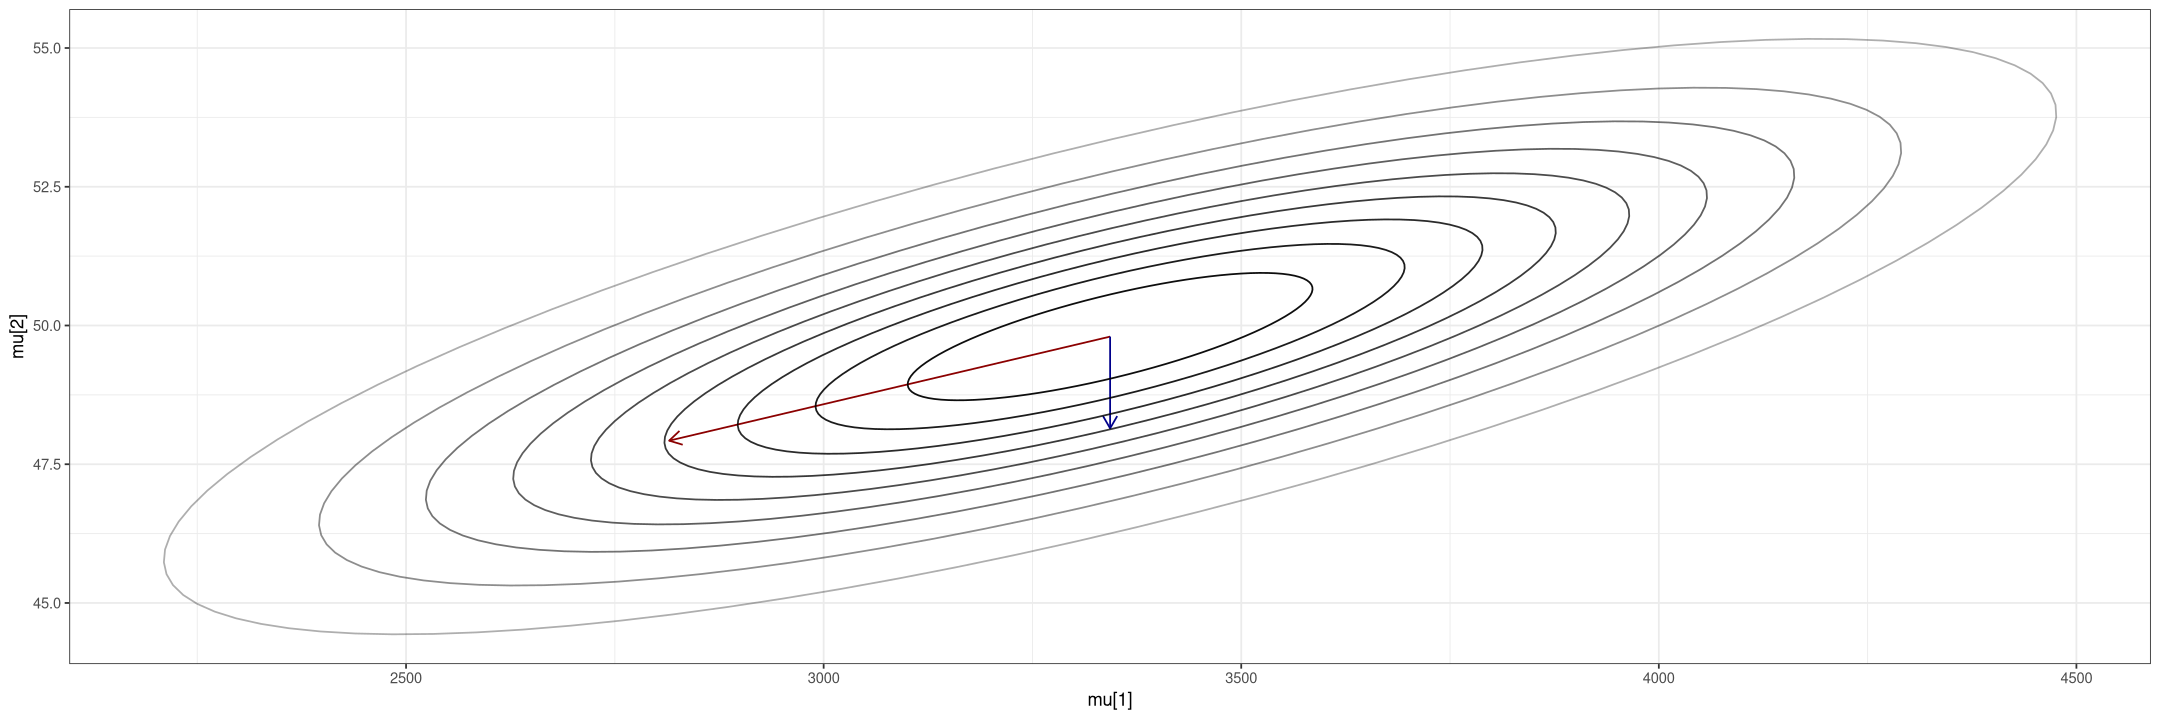

In [88]:
confidence.ellipse(µ, 𝞢)

The strong skew of the ellipse relates to the high correlation coefficient. $\\$
L is distributed accordingly to N(49.8, 6.25). $\\$
Mean (49.8 cm) is the best guess for the child's length. $\\$
With the 68% probability the error of this prediction is not larger than one standard deviation of 2.5.

# Problem 4

### Conditional Normal Distribution of Two Normal Distributions

$ L|W=w \sim \mathcal{N}(\mu_L + \rho\frac{\sigma_L}{\sigma_W}(w - \mu_W), \sigma_L^2(1 - \rho^2)) $




In [89]:
cat("mean = ", 49.8 + 0.75*2.5/528*(4025 - 3343), " var = ", (2.5**2) * (1 - 0.75**2))

mean =  52.22187  var =  2.734375

In [90]:
sqrt((2.5**2) * (1 - 0.75**2))

[1] 1.653595

L ~ N(52.22187, 2.734375). $\\$
Mean (52.22187 cm) is the best guess for the child's length.
With 68% confidence the error of this prediction is within one standard deviation of 1.65359456941537.
We observe that standard deviation is now smaller from our previous estimate and thus our guess is more accurate.

# Problem 5
$ X_i \sim \normal(\mu_{(i)}, \cov_{(i)})$

$ V_i \sim \normal(\mu_i, \cov_i)$

$ (V_1, V_2) \sim \normal(\mu, \cov) = \normal(\matrix{\mu_1 \\ \mu_2}, \matrix{\cov_{1} & \cov_{12} \\ \cov_{21} & \cov_{2}}) \\ $

Where:
- $ \mu_1 = \frac{1}{4}\mu_{(1)} - \frac{1}{2}\mu_{(2)} + \frac{1}{4}\mu_{(3)} $
- $ \mu_2 = \frac{1}{4}\mu_{(1)} - \frac{1}{2}\mu_{(2)} - \frac{1}{4}\mu_{(3)} $
- $ \cov_1 = \frac{1}{4^2}\cov_{(1)} - \frac{1}{2^2}\cov_{(2)} + \frac{1}{4^2}\cov_{(3)} $
- $ \cov_2 = \frac{1}{4^2}\cov_{(1)} - \frac{1}{2^2}\cov_{(2)} - \frac{1}{4^2}\cov_{(3)} $
- $ \cov_{12} = \cov_{21}^T = E[V_1^TV_2] - E[V_1^T]E[V_2] = \frac{1}{4^2}\cov_{(1)} - \frac{1}{2^2}\cov_{(2)} - \frac{1}{4^2}\cov_{(3)} $



# Project

In [91]:
is_within_ellipse = function(v, mu, sigma, level = 0.68) {
	return( n * t(v - mu) %*% solve(sigma) %*% (v - mu) <= qchisq(level, df=2) )
}

make.plots = function(sample) {
	par(mfrow = c(1, 2))
	options(repr.plot.width=18, repr.plot.height=6)

	hist(sample, density=20, breaks=200, prob=TRUE, main="Histogram")
	curve(dnorm(x, mean=mean(sample), sd=sqrt(var(sample))), col="darkred", lwd=3, add=TRUE)

	qqnorm(sample, col = rgb(red = 0, green = 0, blue = 0, alpha = 0.1))
	qqline(sample, col="darkred", lwd=3)
}

### Part One

In [92]:
data = read.table("WeightLength.txt", header = TRUE, sep = "\t")

##### Using the data estimate the mean and the covariance for the length and the weight of children.

In [93]:
mean_weight = mean(data$Weight)
mean_length = mean(data$Length)
var_weight = var(data$Weight)
var_length = var(data$Length)
covariance = cov(data$Weight, data$Length)


cat(
	"mean_weight: ", mean_weight,
	"\nmean_length: ", mean_length,
	"\ncovariance: ", covariance
)

mean_weight:  3233.545 
mean_length:  49.23764 
covariance:  915.2955

##### Verify graphically normal distribution of the data. Use a scatterplot and qq-plots for the marginal distributions.

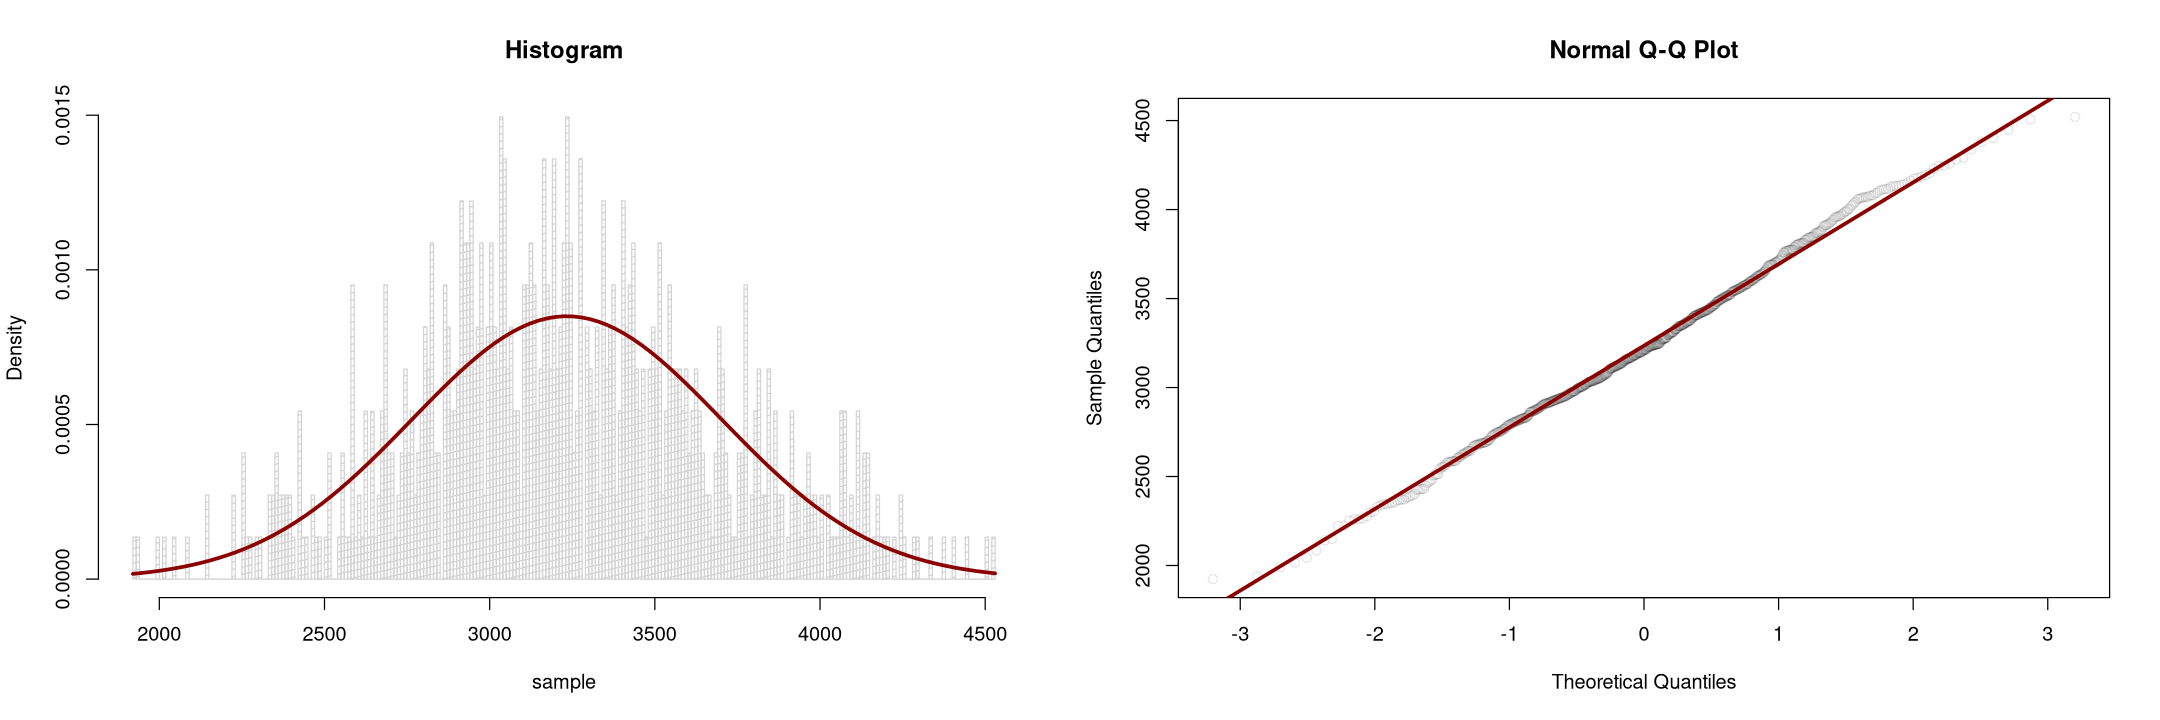

In [94]:
make.plots(data$Weight)

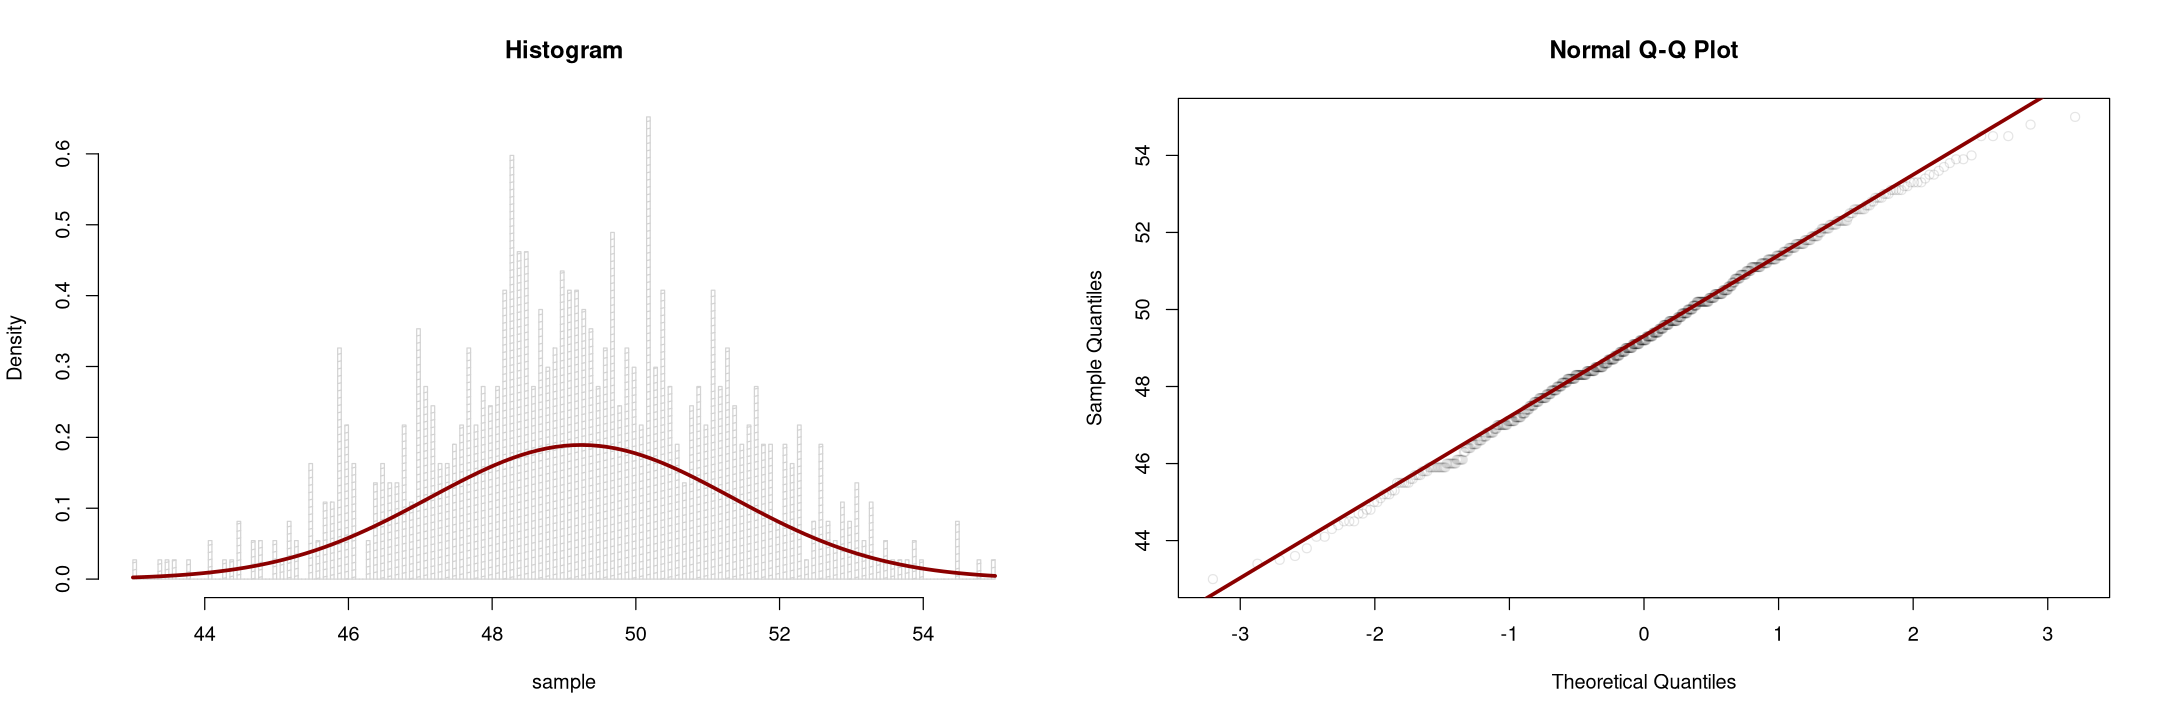

In [95]:
make.plots(data$Length)

##### Find the ellipsoids that would serve classification regions for scores as described above.

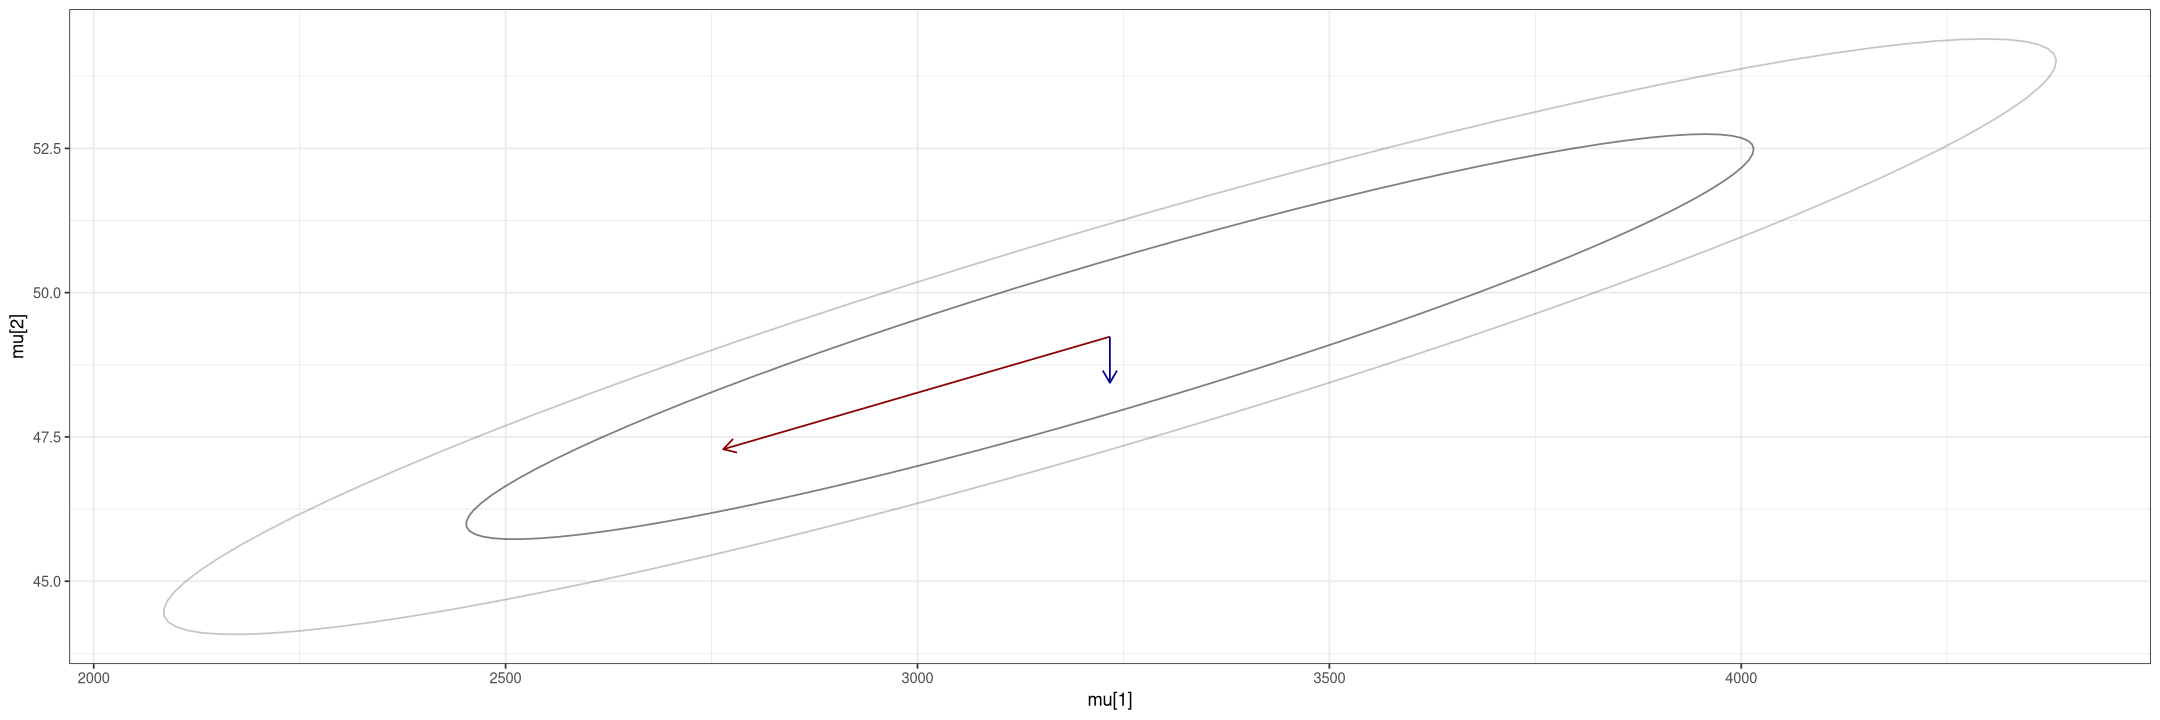

In [96]:
µ = c(mean_weight, mean_length)
𝞢 = matrix(cov(data), nrow=2)
confidence.ellipse(µ, 𝞢, list(0.75, 0.95)) 

In [97]:
𝞢

220276.6577,915.295511
915.2955,4.443303


##### How many children would score zero, one, and two, respectively? Illustrate this classification on the graphs.

In [98]:
scores = function(data, µ, 𝞢, levels = list(0.75, 0.95)) {
	df = data.frame(data)
	for (level in levels) {
		df[[paste(level)]] = apply(data, 1, function(v) {is_within_ellipse(v, µ, 𝞢, level = level)})
	}
	df$Score <- rowSums(df[, (ncol(df) - length(levels) + 1):ncol(df)])
	return(df)
}

In [99]:
data.frame(table(Score = scores(data, µ, 𝞢)$Score))

Score,Freq
<fct>,<int>
0,38
1,157
2,541


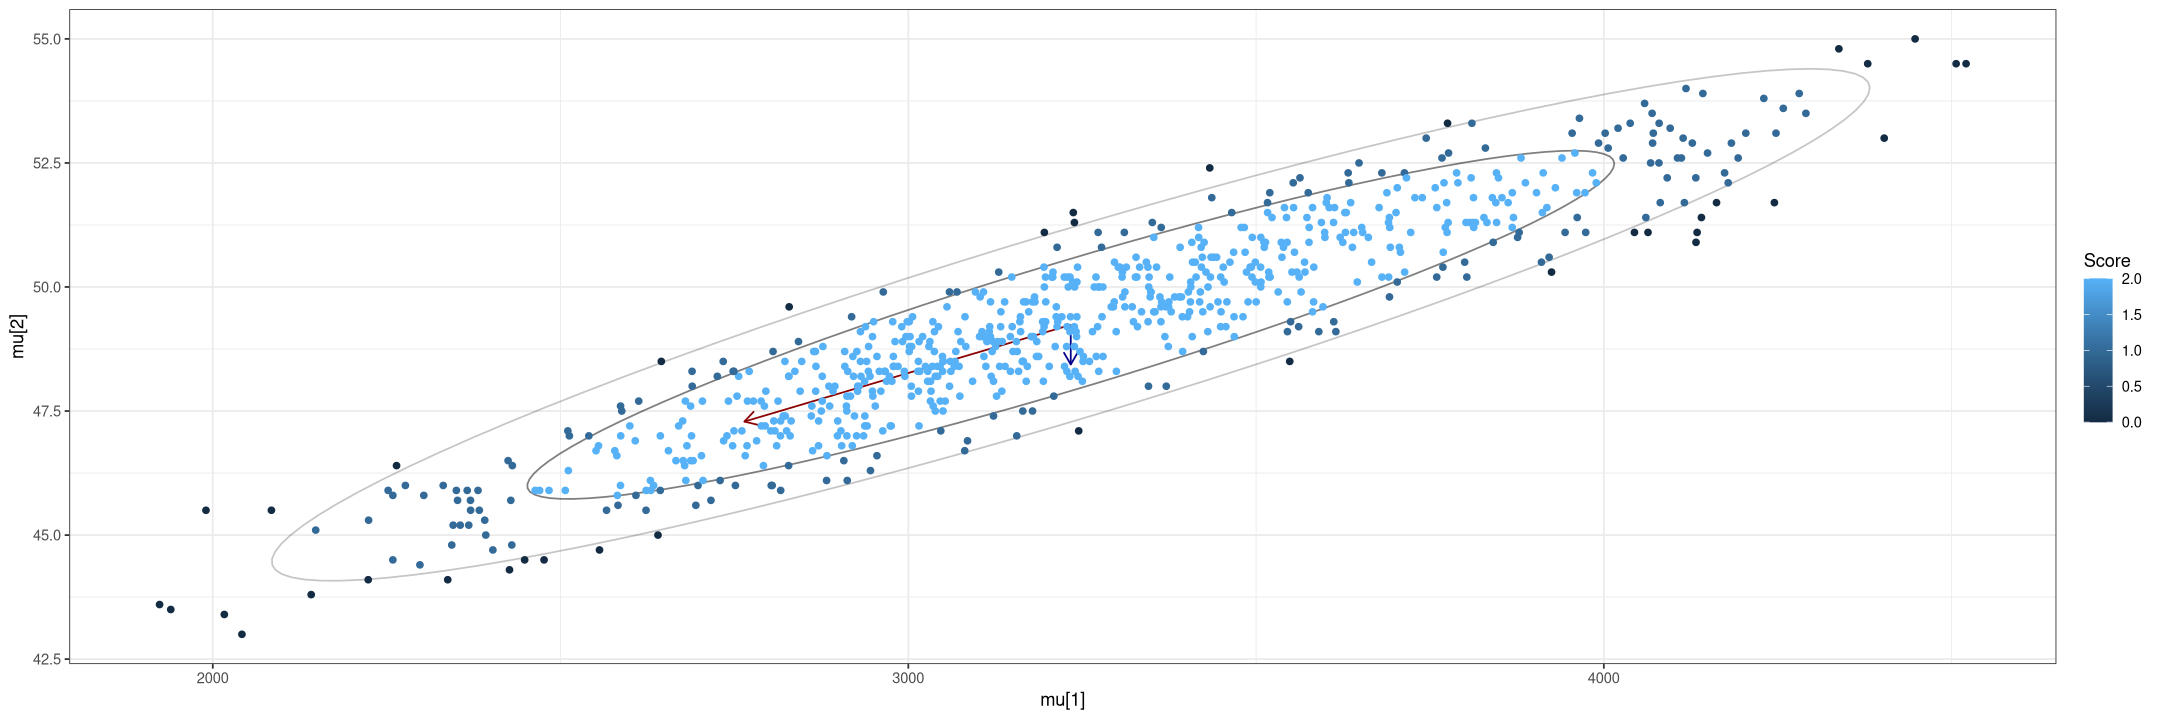

In [100]:
confidence.ellipse(as.numeric(µ), 𝞢, list(0.75, 0.95)) + geom_point(data = scores(data, µ, 𝞢), aes(x = Weight, y = Length, color = Score))

##### Find the spectral decomposition of the estimated covariance matrix.

In [101]:
e = eigen(𝞢)
P = e$vectors
Λ = diag(e$values)

cat(
	"decomposition:",
	"\nP: ", P,
	"\nΛ: ", Λ
)

decomposition: 
P:  -0.9999914 -0.004155185 0.004155185 -0.9999914 
Λ:  220280.5 0 0 0.6400477

##### Plot the data transformed according to PT X, where P is the matrix made of the eigenvectors standing as the columns. Interpret the transformed data.

In [102]:
px = as.matrix(data) %*% t(P)
colnames(px) = c("Weight", "Length")
dpx = as.data.frame(px)

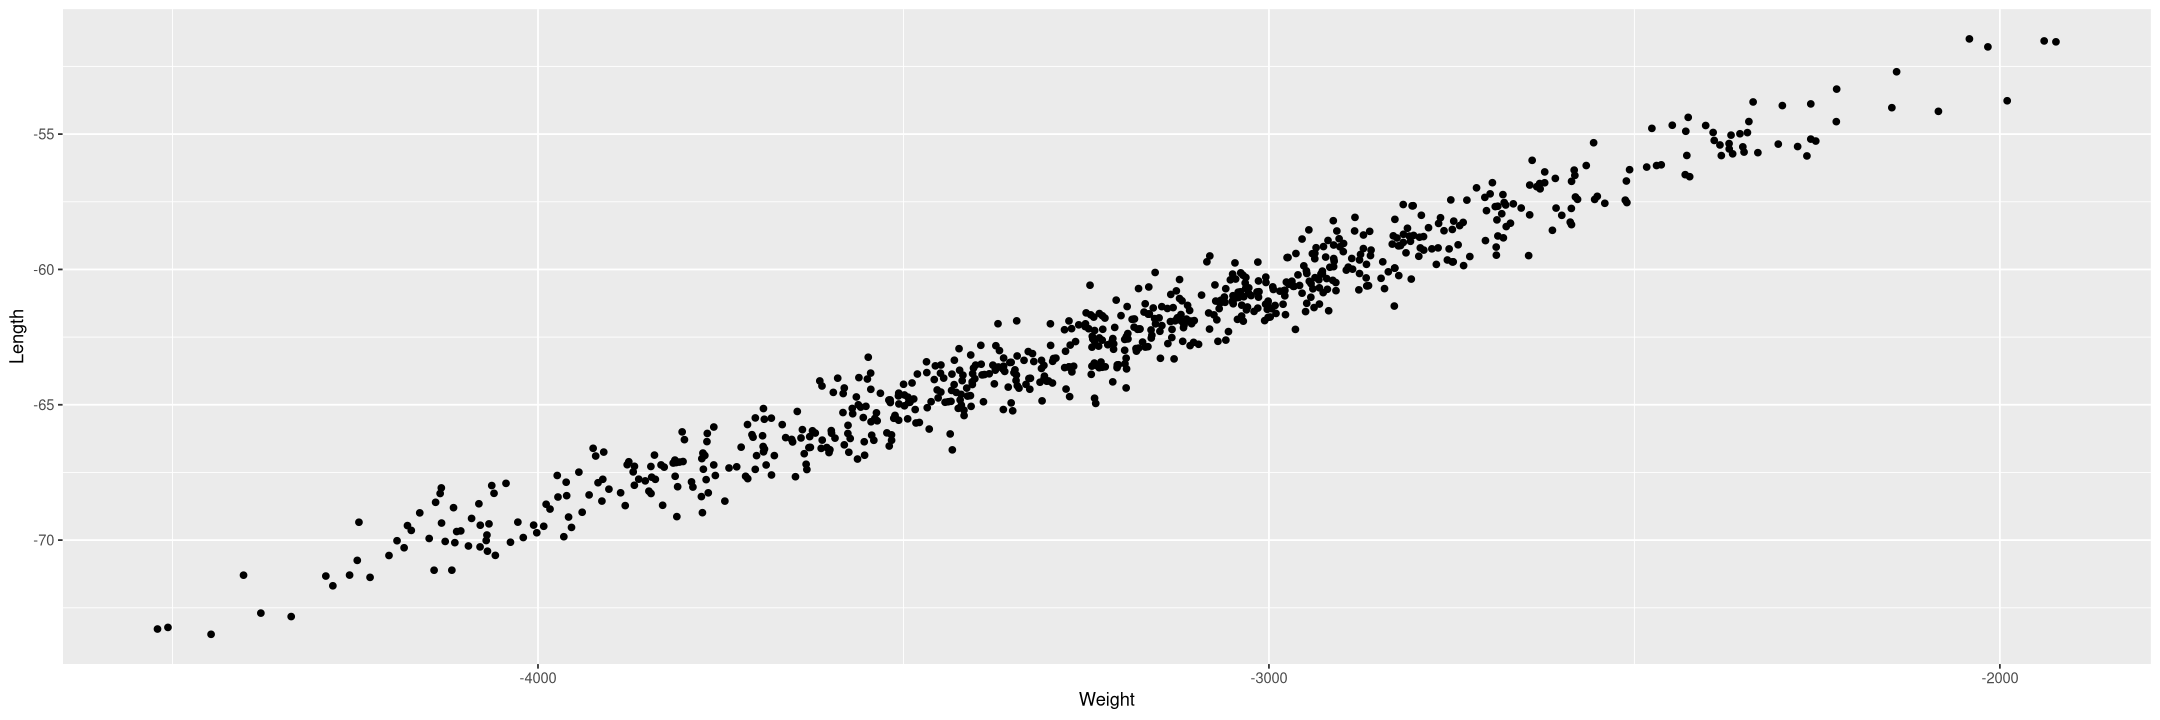

In [103]:
ggplot(dpx, aes(x=Weight, y=Length)) + geom_point()

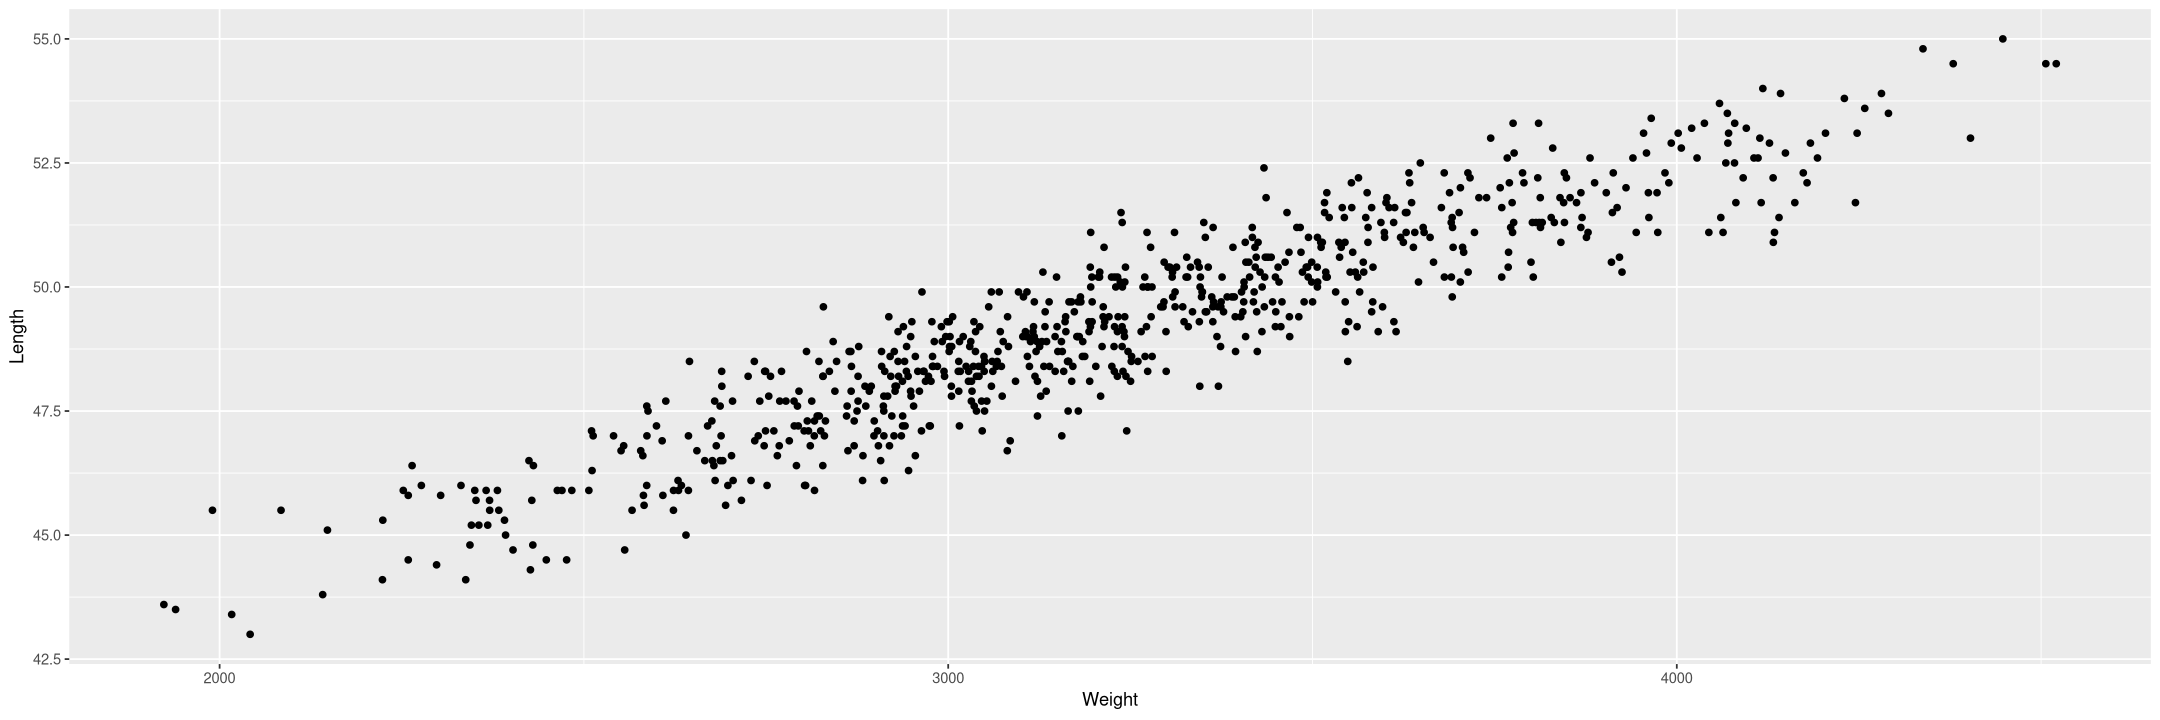

In [104]:
ggplot(data, aes(x=Weight, y=Length)) + geom_point()

### Part Two

In [105]:
data = read.table("ParentsWeightLength.txt", header = TRUE, sep = "\t")

##### Using the data estimate the mean and the covariance for all four variables

In [106]:
means = colMeans(data)
covrs = cov(data)

In [107]:
µ

[1] 3233.54511   49.23764

In [108]:
covrs

,FatherHeight,MotherHeight,Weight,Length
FatherHeight,12.6120963,0.6310056,931.8590,3.289545
MotherHeight,0.6310056,9.7721065,827.2878,2.852147
Weight,931.8589629,827.2877829,220276.6577,915.295511
Length,3.2895454,2.8521470,915.2955,4.443303


In [109]:
# means
µWL = means[3:4]
µFM = means[1:2]

# covariances
𝞢WL = covrs[3:4, 3:4]
𝞢FM = covrs[1:2, 1:2]
𝞢WLFM = covrs[1:2, 3:4]
𝞢FMWL = covrs[3:4, 1:2]

𝞢FM.inv = solve(𝞢FM)

##### Verify graphically the normal distribution of the data. Use scatterplots and qq-plots for the marginal distributions.

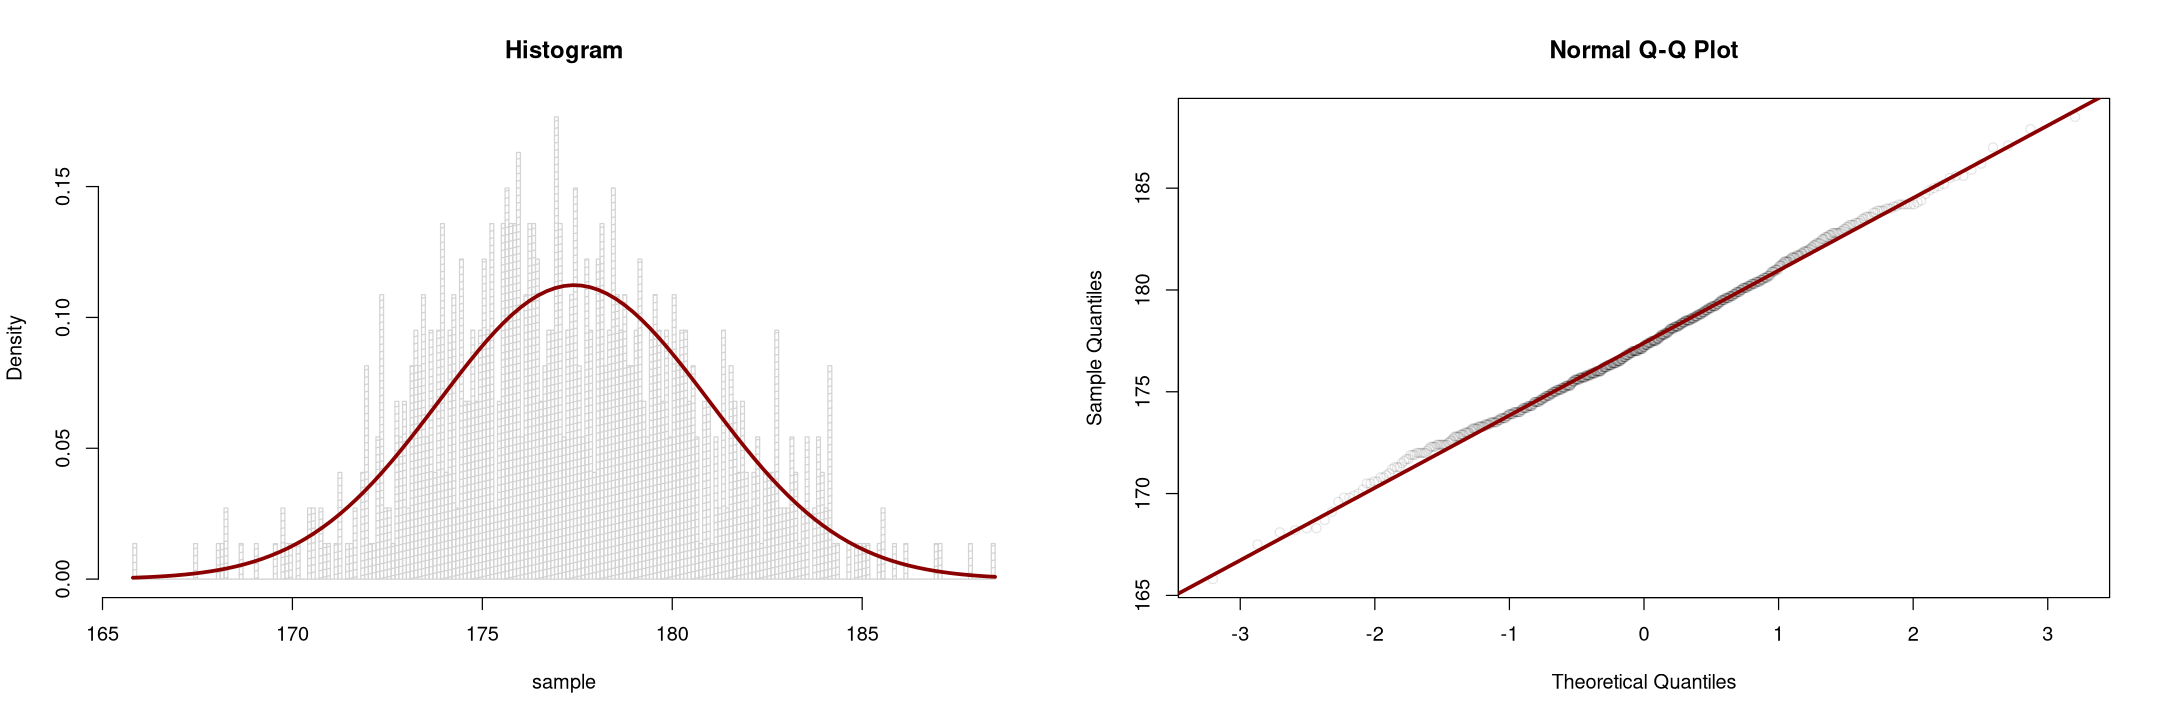

In [110]:
make.plots(data$FatherHeight)

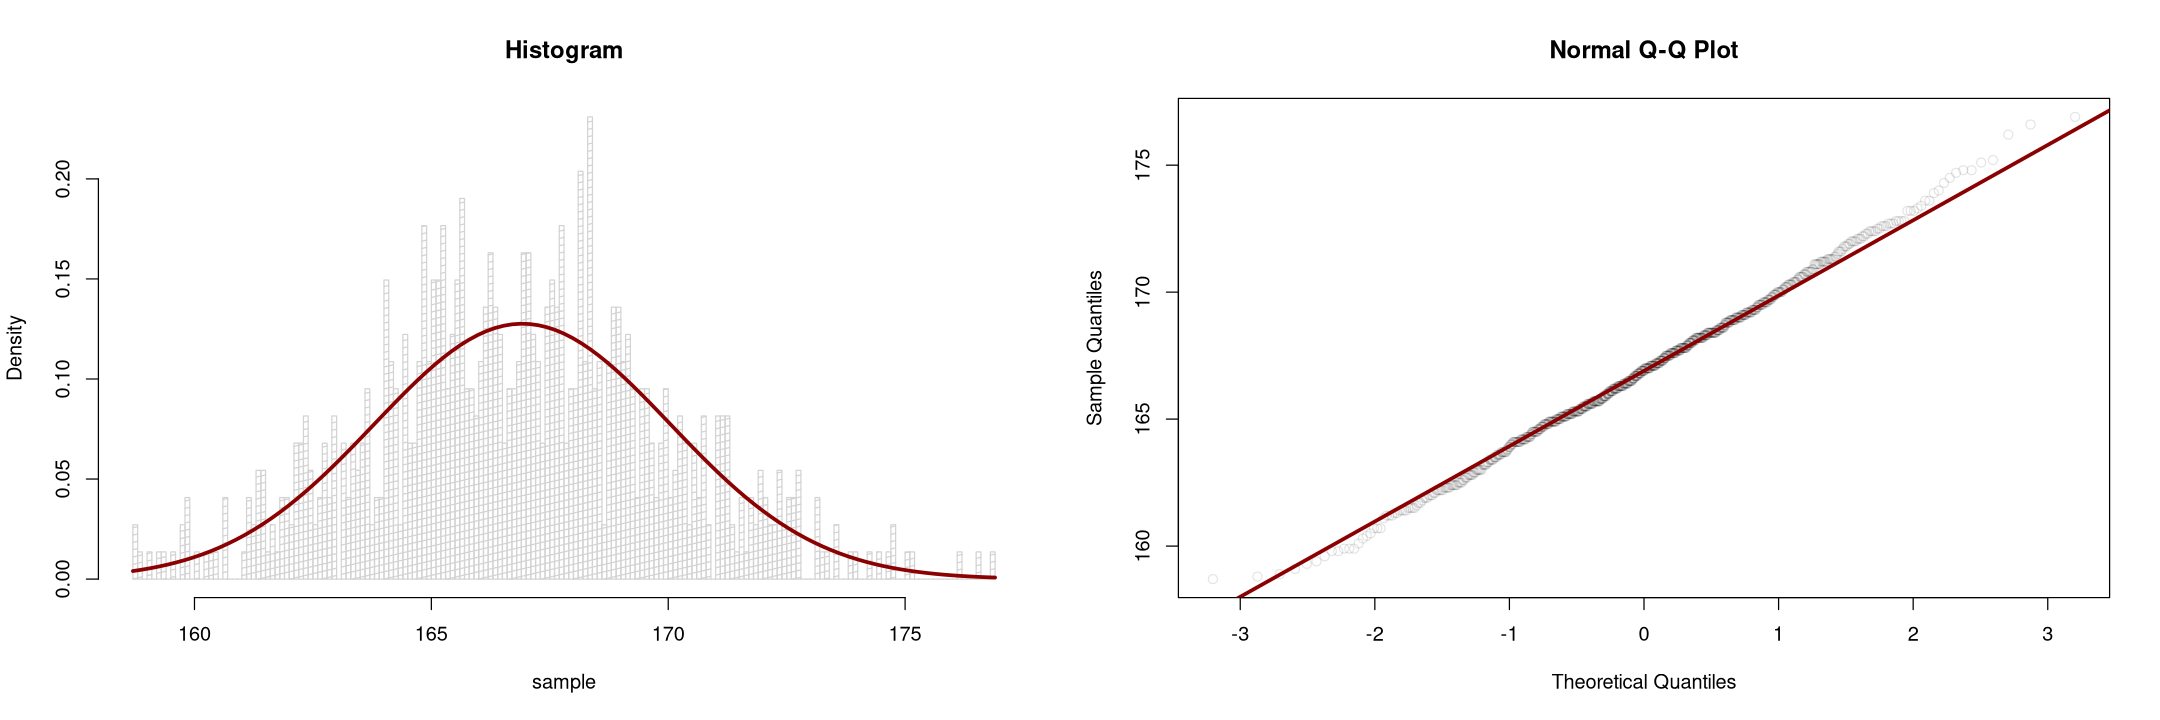

In [111]:
make.plots(data$MotherHeight)

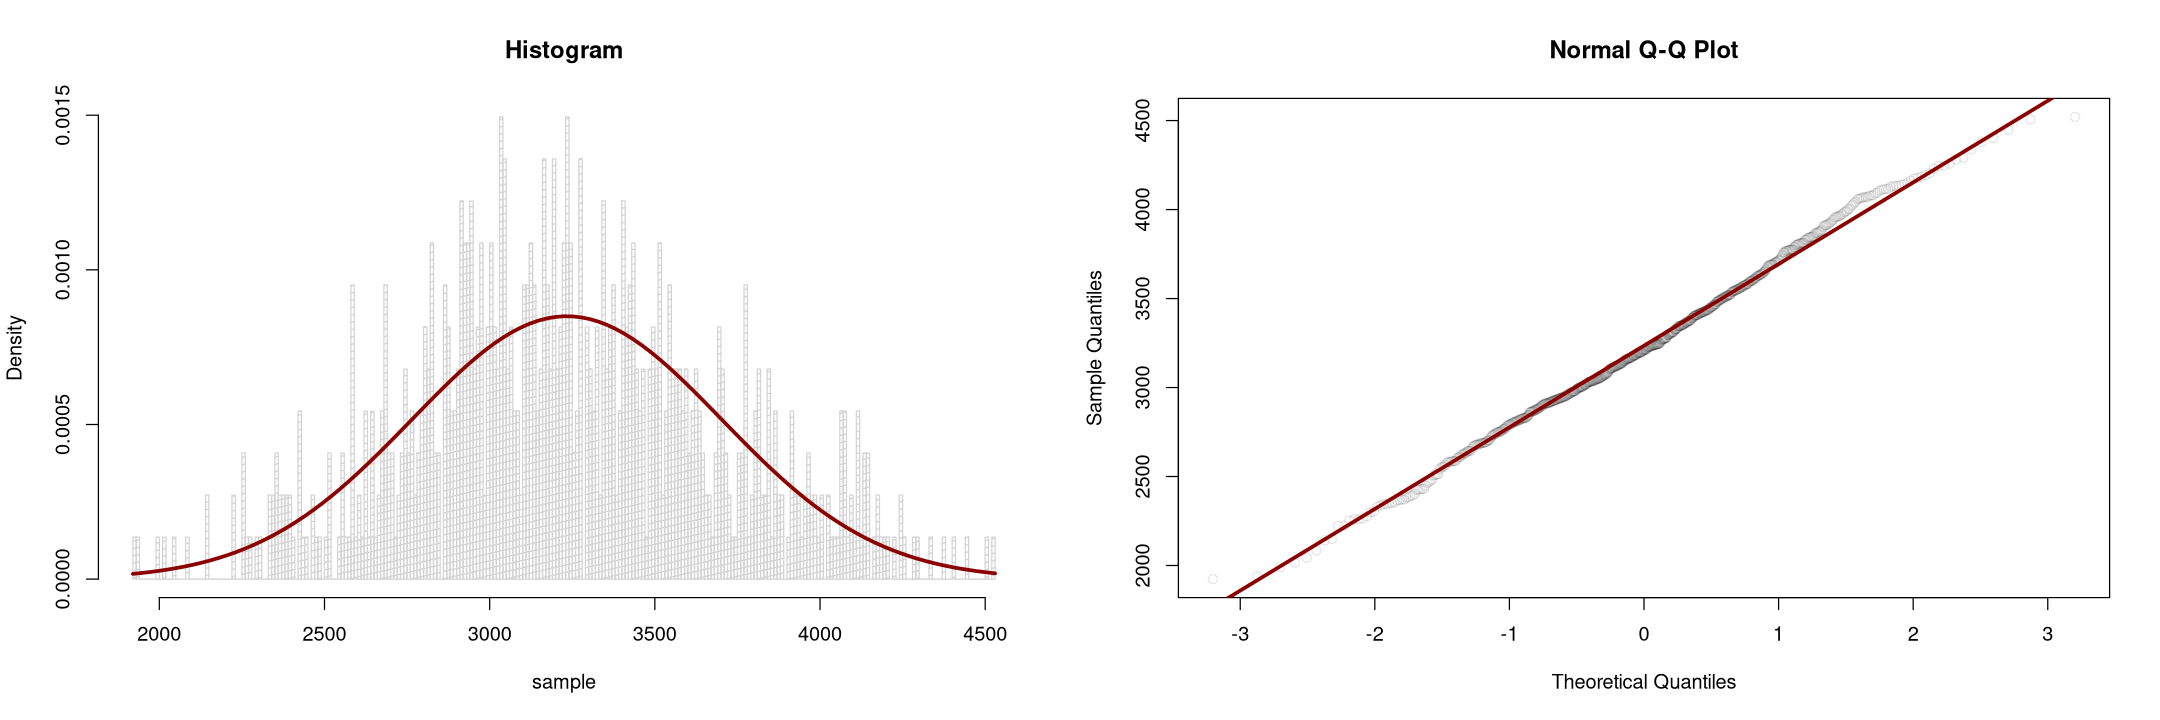

In [112]:
make.plots(data$Weight)

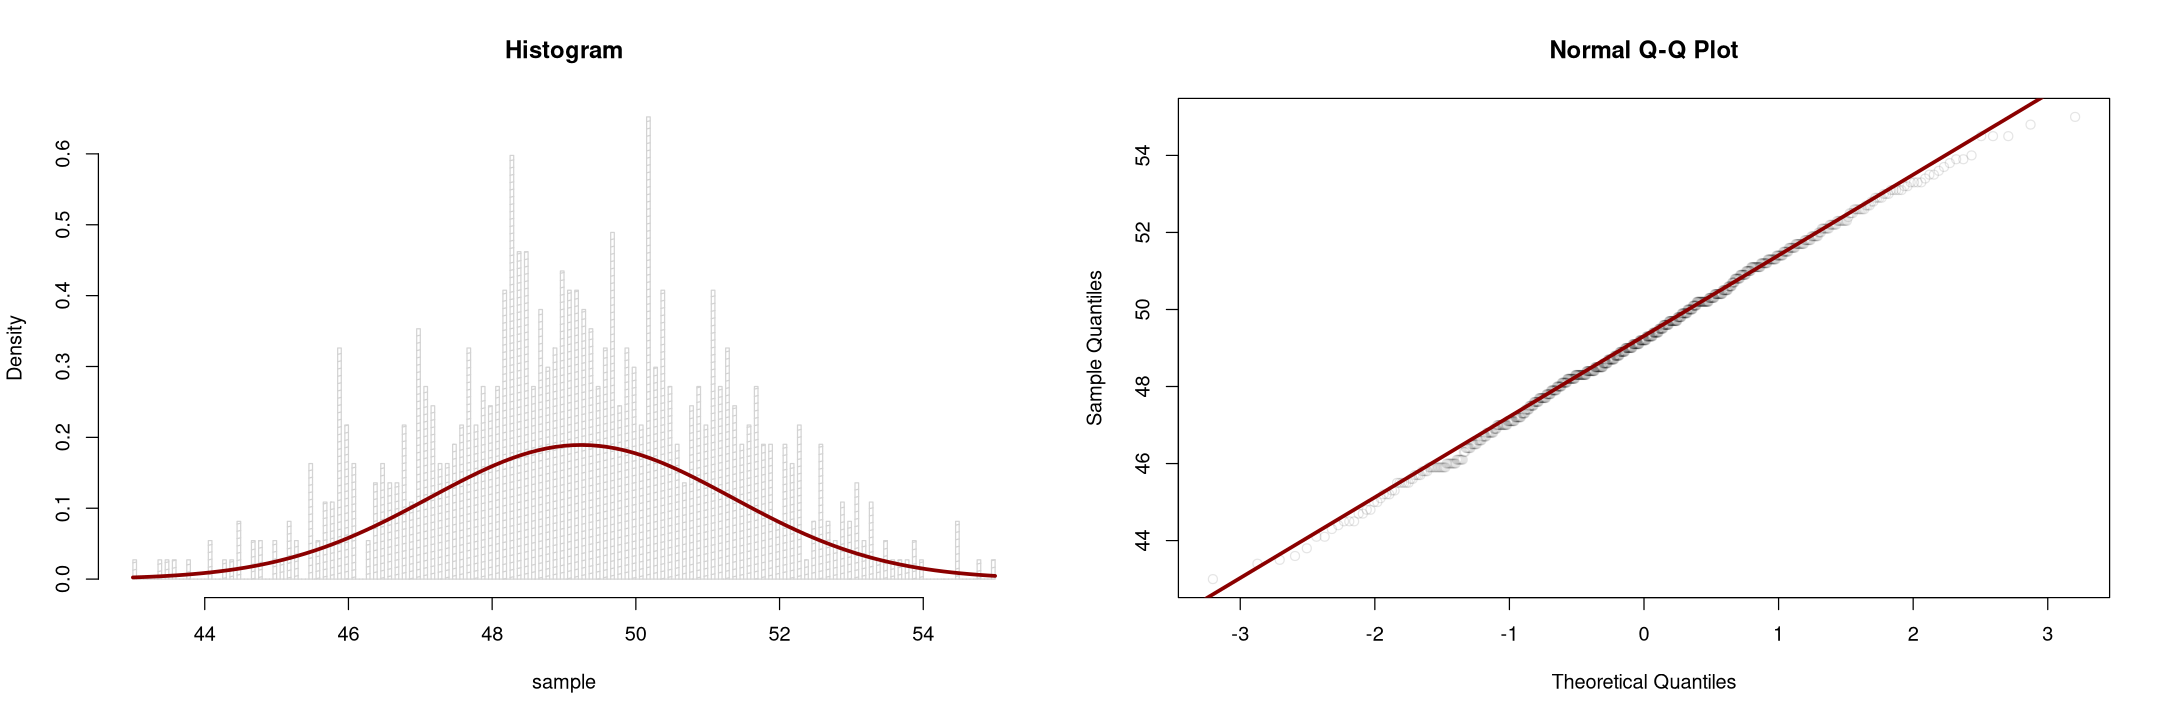

In [113]:
make.plots(data$Length)

##### Identify the conditional distribution of the weight and length of a child given the heights of parents. Find an estimate of the covariance matrix of the conditional distribution and compare it with the original unconditional covariance.

Conditional distribution of two bivariate normal distributions

$ L,W|F=f,M=m \sim \mathcal{N}(\mu_{WL} + \sum_{FMWL}\sum_{FM}^{-1}(\begin{bmatrix} f \\ m \end{bmatrix} - \mu_{FM}), \sum_{WL} - \sum_{FMWL}\sum_{FM}^{-1}\sum_{WLFM}) $

In [114]:
µ = function (fm) µWL + 𝞢FMWL %*% 𝞢FM.inv %*% (fm - µFM)
𝞢 = 𝞢WL - (𝞢FMWL %*% 𝞢FM.inv %*% 𝞢WLFM) 

In [115]:
𝞢WL; 𝞢

,Weight,Length
Weight,220276.6577,915.295511
Length,915.2955,4.443303


,Weight,Length
Weight,88857.9955,456.846078
Length,456.8461,2.843767


##### How the ellipsoids based on the conditional distribution will look like?

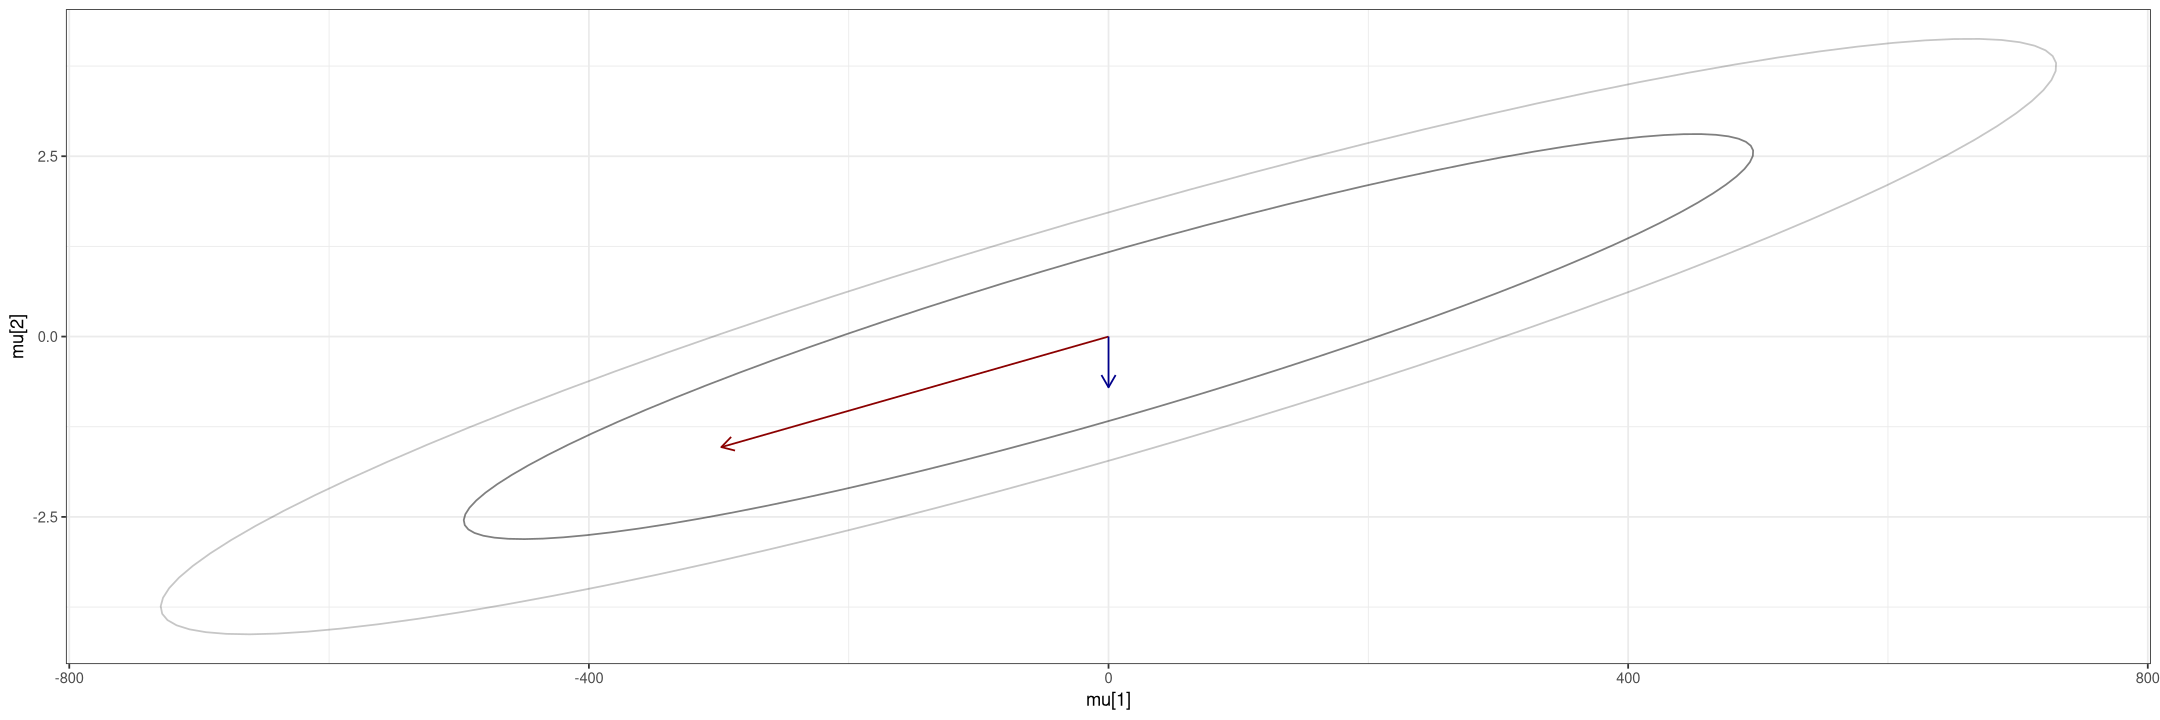

In [127]:
confidence.ellipse(c(0,0), matrix(as.numeric(𝞢), nrow=2), levels=list(0.75, 0.95))

##### How many children would score zero, one, and two, respectively? Illustrate this classification on the graph and compare with the one obtained without considering the heights of parents.

In [117]:
conditional.scores = function(data, µ, 𝞢, levels = list(0.75, 0.95)) {
	conditional.ellipse = function (datarow) {
		lw = datarow[c("Weight", "Length")]
		fm = datarow[c("FatherHeight", "MotherHeight")]
		return(is_within_ellipse(lw, µ(fm), 𝞢, level = level))
	}
	df = data.frame(data)
	for (level in levels) {
		df[[paste(level)]] = apply(data, 1, conditional.ellipse)
	}
	df$Score <- rowSums(df[, (ncol(df) - length(levels) + 1):ncol(df)])
	return(df)
}

In [118]:
data.frame(table(Score = conditional.scores(data, µ, 𝞢)$Score))

Score,Freq
<fct>,<int>
0,40
1,137
2,559


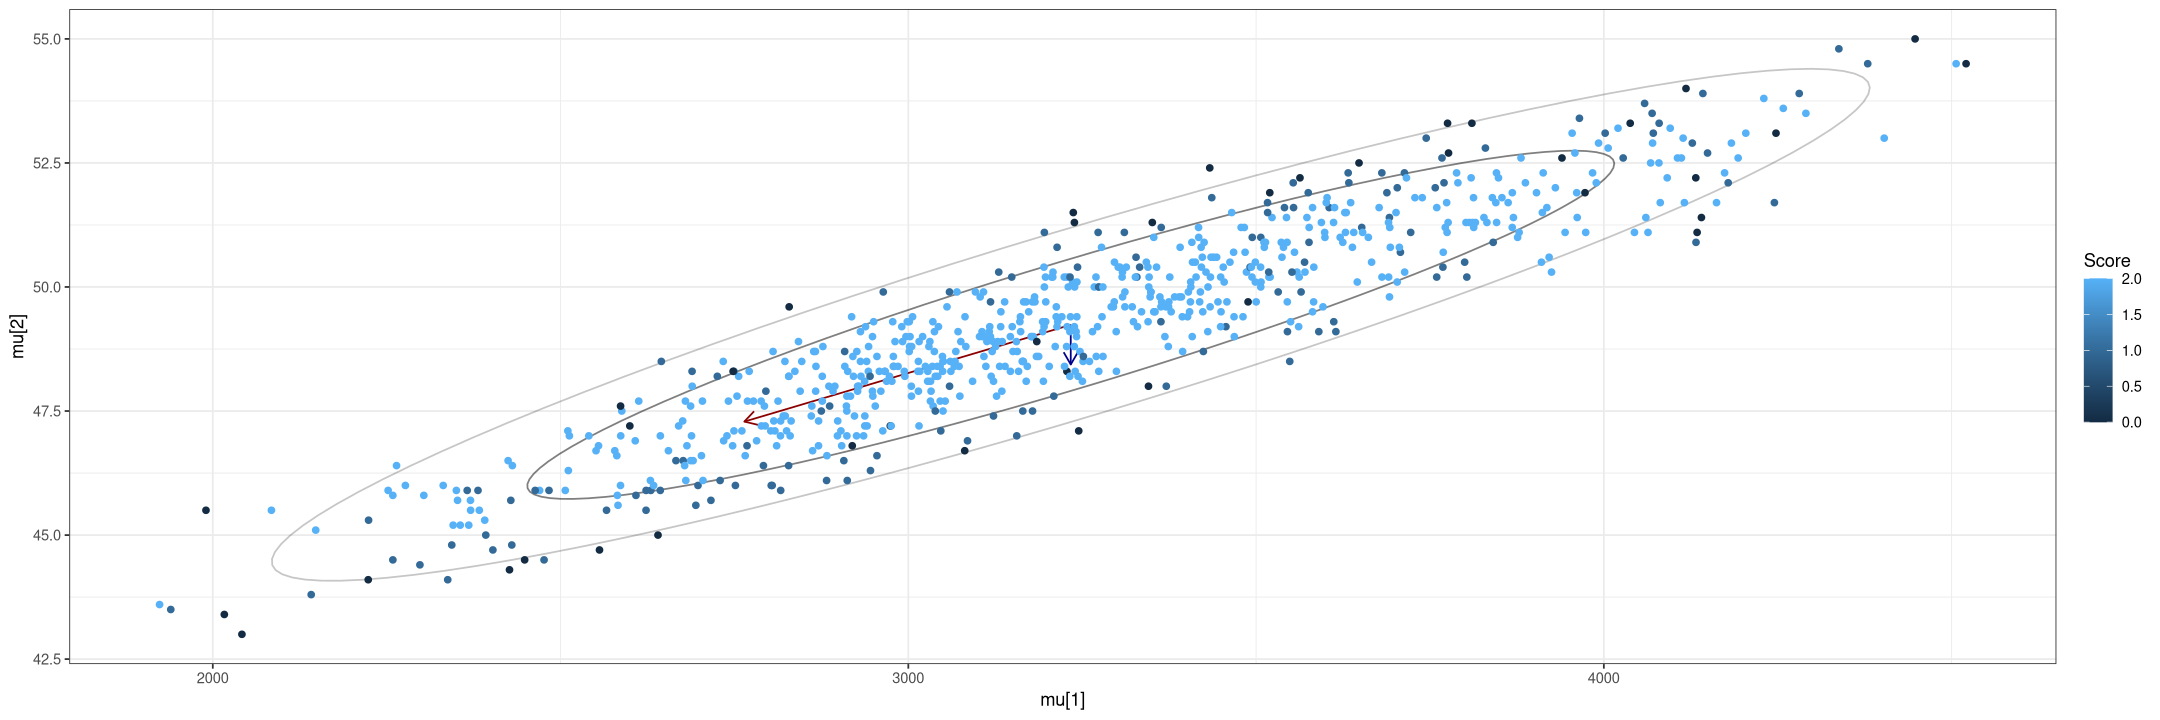

In [119]:
(confidence.ellipse(as.numeric(µWL), matrix(as.numeric(𝞢WL), nrow=2), list(0.75, 0.95))
+ geom_point(data = conditional.scores(data, µ, 𝞢), aes(x = Weight, y = Length, color = Score)))

The plot above shows the conditional classification with uncoditional classification zones superimposed.

##### Suppose that the father of a child is 185[cm] tall and mother is 178[cm] tall. Plot the classification ellipsoids for their child.

In [120]:
µ = µWL + 𝞢FMWL %*% solve(𝞢FM) %*% (c(185, 178) - µFM)
𝞢 = 𝞢WL - (𝞢FMWL %*% solve(𝞢FM) %*% 𝞢WLFM) 

In [121]:
µ; 𝞢

Weight,4651.53730
Length,54.16829


,Weight,Length
Weight,88857.9955,456.846078
Length,456.8461,2.843767


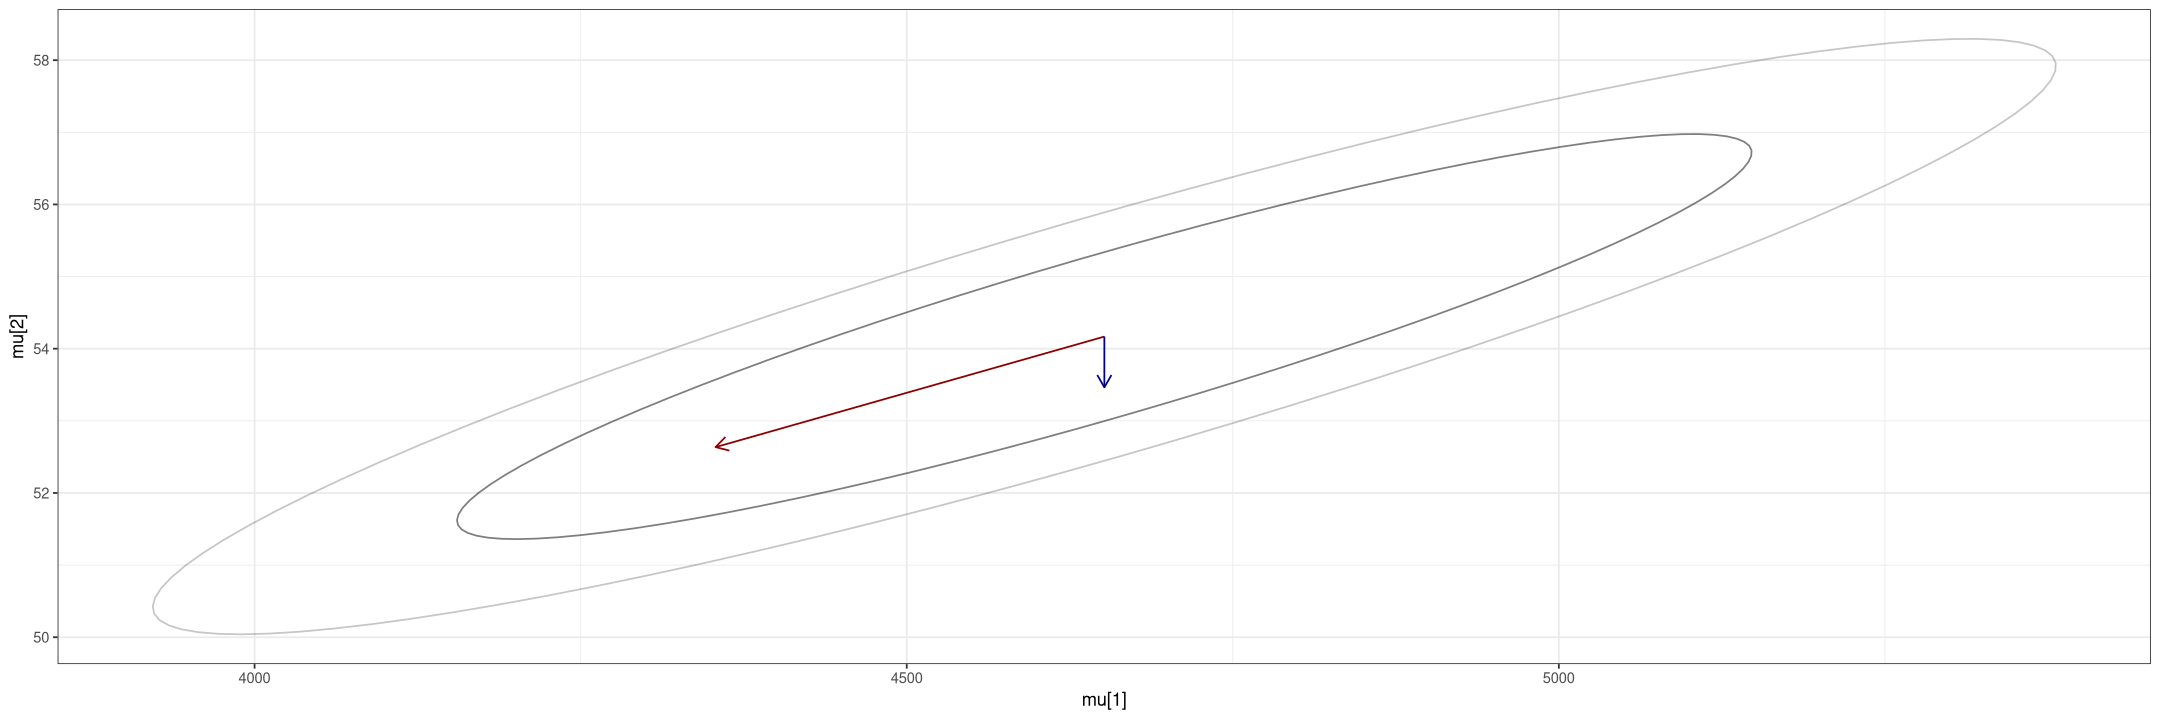

In [122]:
confidence.ellipse(as.numeric(µ), matrix(as.numeric(𝞢), nrow=2), list(0.75, 0.95))

##### Find spectral decomposition of the estimated covariance matrix for the complete set of the data.

In [123]:
e = eigen(𝞢)
P = e$vectors
Λ = diag(e$values)

cat(
	"decomposition:",
	"\nP: ", P,
	"\nΛ: ", Λ
)

decomposition: 
P:  -0.9999868 -0.005141266 0.005141266 -0.9999868 
Λ:  88860.34 0 0 0.494969

##### Transform the data the according to $P^TX$. Plot scatter plots of the transformed data.

In [124]:
px = as.matrix(data[c("Weight", "Length")]) %*% t(P)
colnames(px) = c("Weight", "Length")
dpx = as.data.frame(px)

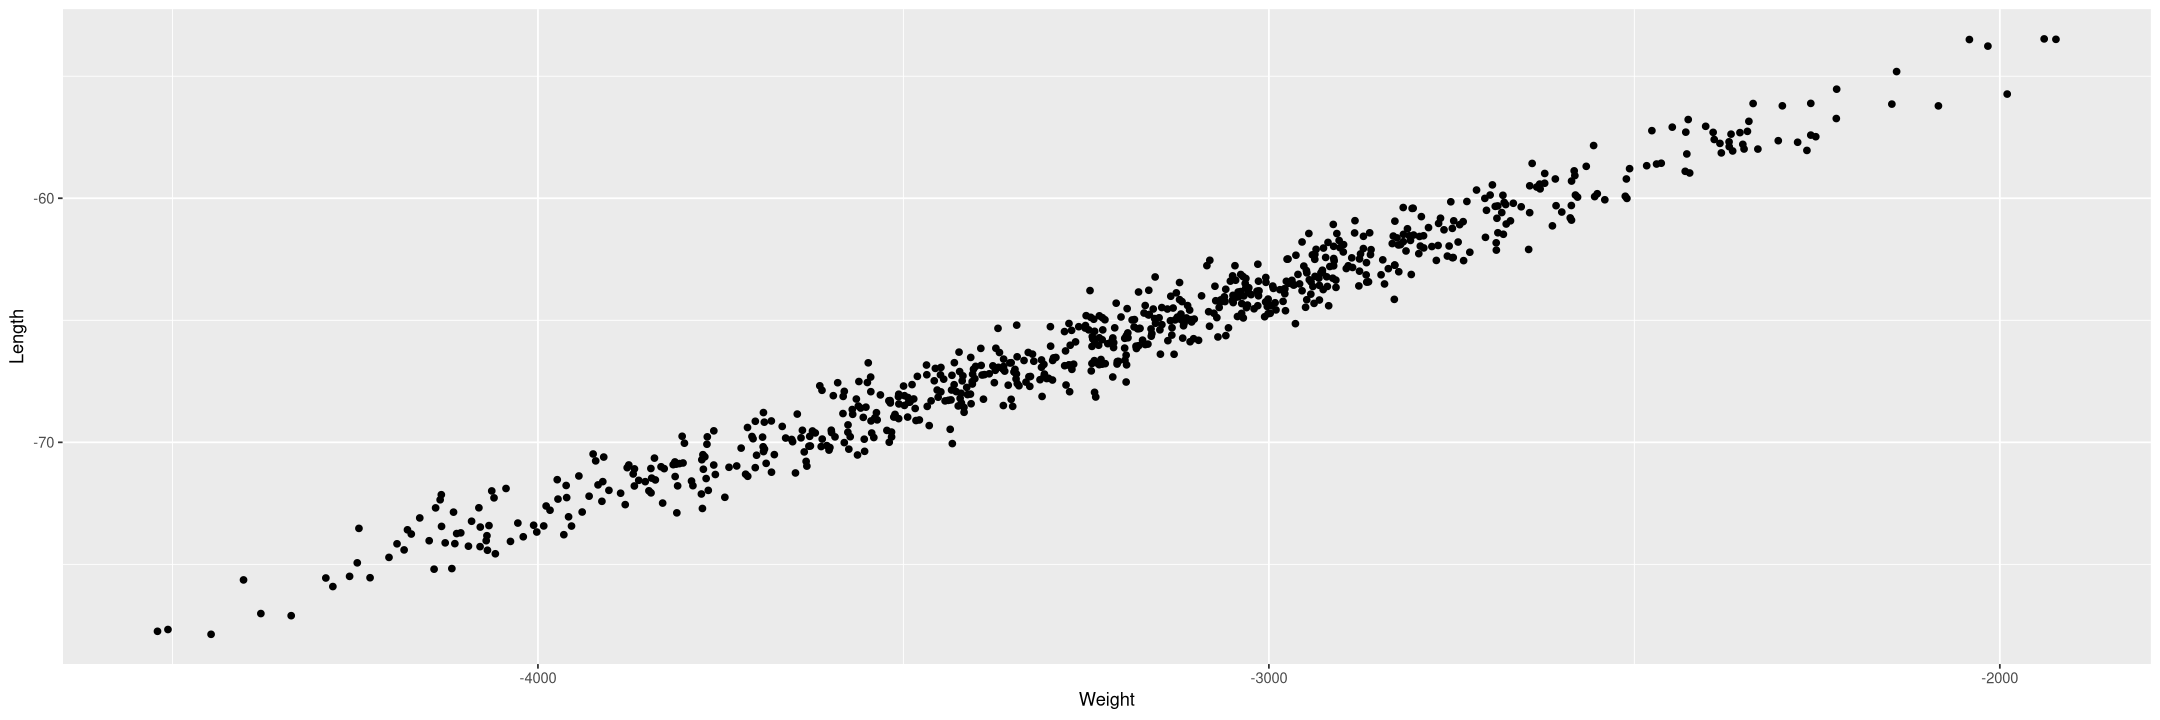

In [125]:
ggplot(dpx, aes(x=Weight, y=Length)) + geom_point()

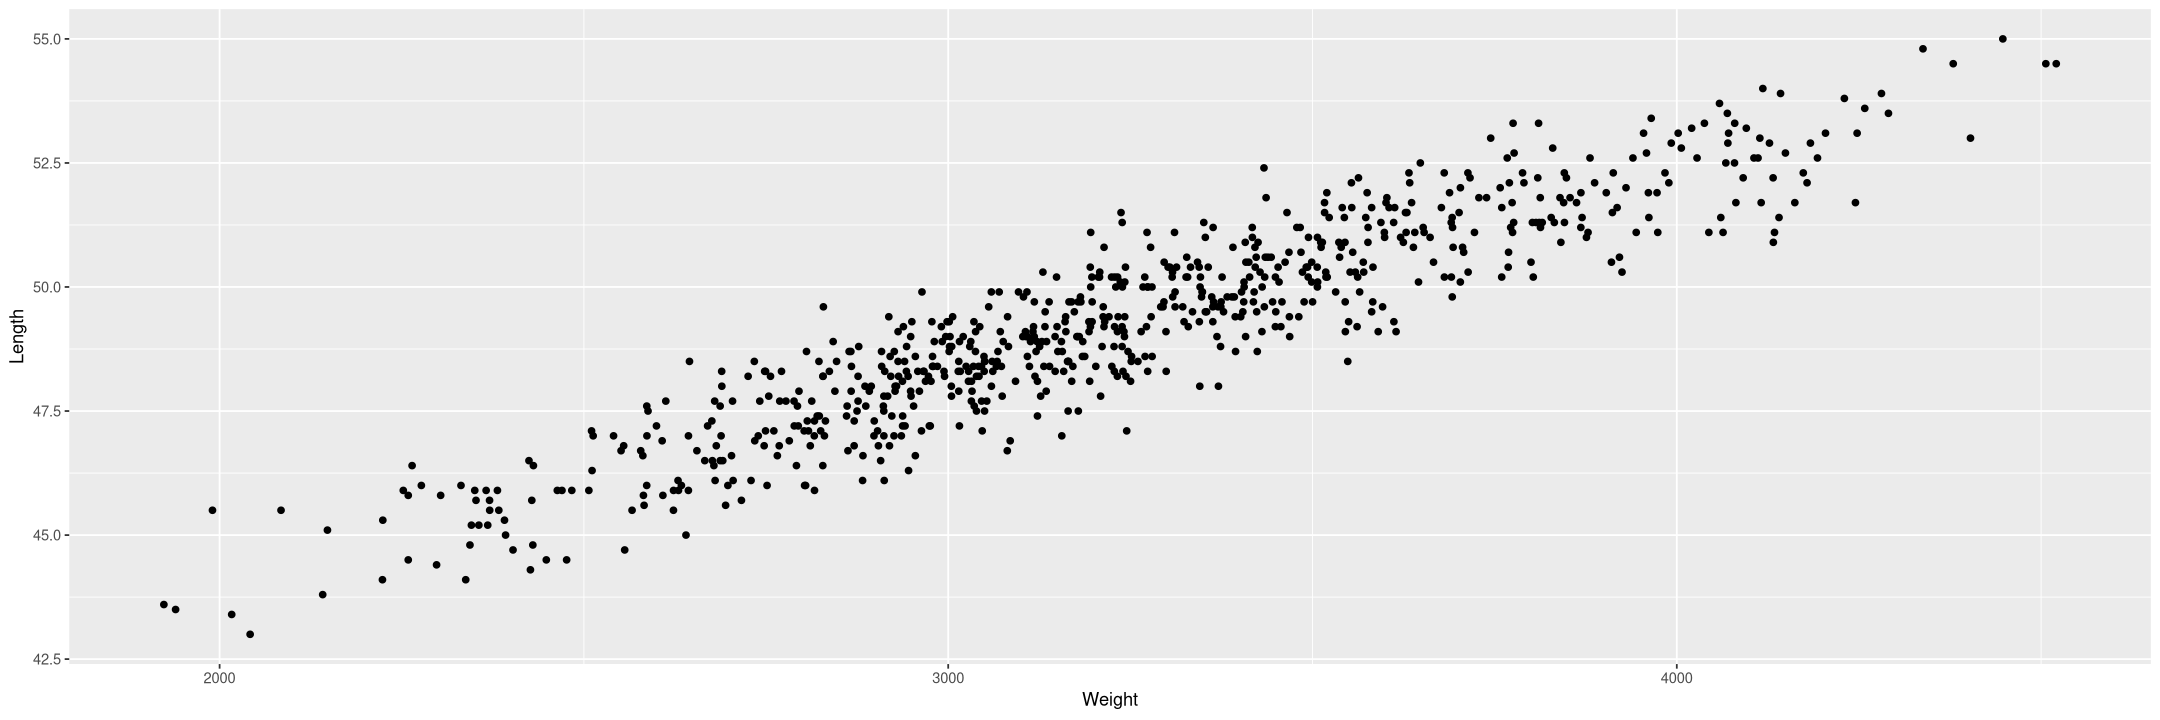

In [126]:
ggplot(data, aes(x=Weight, y=Length)) + geom_point()